In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("diabetes_data.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y = data.Outcome.values
x_data = data.drop(["Outcome"],axis=1)

In [4]:
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
# Normalization or scaling

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.007092,0.174941,0.085106,0.041371,0.000000,0.039716,0.000741,0.059102
1,0.001182,0.100473,0.078014,0.034279,0.000000,0.031442,0.000415,0.036643
2,0.009456,0.216312,0.075650,0.000000,0.000000,0.027541,0.000794,0.037825
3,0.001182,0.105201,0.078014,0.027187,0.111111,0.033215,0.000197,0.024823
4,0.000000,0.161939,0.047281,0.041371,0.198582,0.050946,0.002704,0.039007
...,...,...,...,...,...,...,...,...
763,0.011820,0.119385,0.089835,0.056738,0.212766,0.038889,0.000202,0.074468
764,0.002364,0.144208,0.082742,0.031915,0.000000,0.043499,0.000402,0.031915
765,0.005910,0.143026,0.085106,0.027187,0.132388,0.030969,0.000290,0.035461
766,0.001182,0.148936,0.070922,0.000000,0.000000,0.035579,0.000413,0.055556


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [7]:
print("Train Data Length", len(x_train))
print("Test Data Length", len(x_test))

Train Data Length 8
Test Data Length 8


In [8]:
# weight and bias is needed for the model to learn 
# because we will use gradient descent algorithm to find the best parameters 
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

# sigmoid function is the activation function
def sigmoid(z):
    y_head = 1 / (1+np.exp(-z))
    return y_head

In [9]:
# Calculating the  Loss function
### Forward and Backward Propagation

def forward_backward_propagation(w,b,x_train,y_head):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head) - (1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    
    #backward propogation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [10]:
### Updating (Learning) Parameters
    
def update(w, b, x_train, y_train, learning_rate, number_of_iteration, print_interval):
    cost_list = []
    index = []

    for i in range(number_of_iteration):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)

        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        
        if i % print_interval == 0:
            index.append(i)
            print("Cost after iteration %i: %f" % (i, cost))

    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list[::print_interval])  # Plotting at specific intervals
    plt.xticks(index, rotation="vertical")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [11]:
x_test.shape[1]

154

In [12]:
x_train.shape[0]

8

In [13]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [14]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations, print_interval):
    
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations, print_interval)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after iteration 0: 0.693601
Cost after iteration 250: 0.659525
Cost after iteration 500: 0.649819
Cost after iteration 750: 0.646810
Cost after iteration 1000: 0.645712
Cost after iteration 1250: 0.645177


Cost after iteration 1500: 0.644813
Cost after iteration 1750: 0.644502
Cost after iteration 2000: 0.644211
Cost after iteration 2250: 0.643927
Cost after iteration 2500: 0.643647
Cost after iteration 2750: 0.643371
Cost after iteration 3000: 0.643098
Cost after iteration 3250: 0.642828
Cost after iteration 3500: 0.642560
Cost after iteration 3750: 0.642296
Cost after iteration 4000: 0.642034
Cost after iteration 4250: 0.641775
Cost after iteration 4500: 0.641518
Cost after iteration 4750: 0.641264
Cost after iteration 5000: 0.641013
Cost after iteration 5250: 0.640764
Cost after iteration 5500: 0.640517
Cost after iteration 5750: 0.640273
Cost after iteration 6000: 0.640031
Cost after iteration 6250: 0.639792
Cost after iteration 6500: 0.639554
Cost after iteration 6750: 0.639319
Cost after iteration 7000: 0.639086
Cost after iteration 7250: 0.638855
Cost after iteration 7500: 0.638626
Cost after iteration 7750: 0.638399
Cost after iteration 8000: 0.638174
Cost after iteration 8250: 0

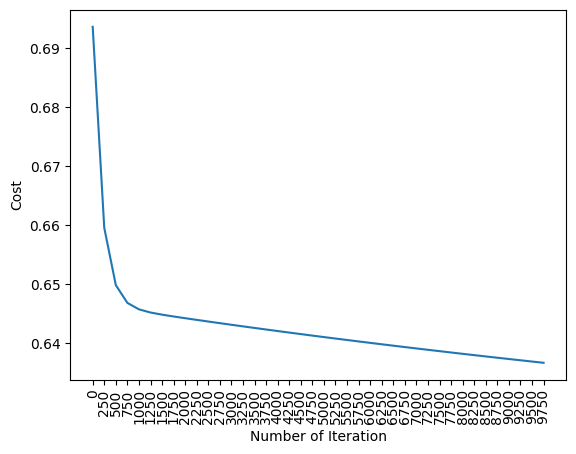

test accuracy: 64.28571428571428 %


In [15]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate=0.01, num_iterations=10000, print_interval=250)

In [16]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])